In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%store -r data_new

In [77]:
data_new.shape

(41772, 74)

In [17]:
col = data_new.columns.tolist()
na_count = data_new.isnull().sum()

In [18]:
col_null = na_count.index[na_count.values>0]

In [19]:
data_new[col_null] = data_new[col_null].fillna(0)

In [44]:
from sklearn.model_selection import train_test_split

X = data_new.ix[:, 1:]
y = data_new.ix[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

## Machine Learning

### Baseline Model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
bl_price = pd.concat((X_train, y_train), axis = 1).groupby(
    ['neighbourhood_cleansed', 'room_type'])['Total_Price'].mean().reset_index(drop = False)

In [41]:
bl_price.head()

,neighbourhood_cleansed,room_type,Total_Price
0,Barking and Dagenham,Entire home/apt,80.111111
1,Barking and Dagenham,Private room,41.068182
2,Barking and Dagenham,Shared room,25.000000
3,Barnet,Entire home/apt,130.820513
4,Barnet,Private room,47.917379


In [46]:
X_test = pd.merge(X_test, bl_price, on = ['neighbourhood_cleansed', 'room_type'], how = 'left')

In [49]:
mean_squared_error(y_test, X_test['Total_Price'])

2779.389098068712

### Drop unnecessary columns in X_train and X_test

In [50]:
X_train = X_train.drop(['neighbourhood_cleansed', 'room_type'], axis = 1)
X_test = X_test.ix[:,:-3]

### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [60]:
%%time
lr = LinearRegression()
score = []
for train_idx, test_idx in kf.split(X_train.values):
    X_train_val, y_train_val = X_train.values[train_idx], y_train.values[train_idx]
    X_test_val, y_test_val = X_train.values[test_idx], y_train.values[test_idx]
    mse = mean_squared_error(y_test_val , lr.fit(X_train_val, y_train_val).predict(X_test_val))
    score.append(mse)

CPU times: user 1.94 s, sys: 221 ms, total: 2.16 s
Wall time: 1.22 s


In [64]:
np.mean(score)

1851.7663082556708

In [65]:
import statsmodels.api as sm

In [82]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.predict?

In [83]:
y_pred = model.predict(sm.add_constant(X_test))

In [84]:
mean_squared_error(y_test, y_pred)

1874.303228574008

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     986.0
Date:                Sat, 29 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:43:55   Log-Likelihood:            -1.7306e+05
No. Observations:               33417   AIC:                         3.463e+05
Df Residuals:                   33349   BIC:                         3.468e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
const                                            20.3545      2.654      7.670      0.000        15.153    25.556
accommodates                                      9.4591      0.283     33.372      0.000         8.904    10.015
bathrooms                                        10.7711      0.501     21.479      0.000         9.788    11.754
bedrooms                                         26.4198      0.500     52.820      0.000        25.439    27.400
beds                                             -3.7375      0.379     -9.874      0.000        -4.479    -2.996
minimum_nights                                   -0.0694      0.033     -2.100      0.036        -0.134    -0.005
number_of_reviews                                -0.0370      0.014     -2.636      0.008        -0.064    -0.009
review_scores_rating                              0.1637      0.041      3.979      0.000         0.083     0.244
review_scores_accuracy                           -0.4021      0.393     -1.023      0.306        -1.173     0.369
review_scores_cleanliness                         3.2230      0.331      9.748      0.000         2.575     3.871
review_scores_checkin                            -2.0442      0.408     -5.013      0.000        -2.843    -1.245
review_scores_communication                      -3.2544      0.412     -7.891      0.000        -4.063    -2.446
review_scores_location                            4.1293      0.334     12.352      0.000         3.474     4.785
review_scores_value                              -4.2733      0.421    -10.154      0.000        -5.098    -3.448
reviews_per_month                                -3.5793      0.270    -13.272      0.000        -4.108    -3.051
host_response_rate                               -9.5570      1.547     -6.178      0.000       -12.589    -6.525
host_acceptance_rate                             -0.6083      0.852     -0.714      0.475        -2.279     1.063
host_days                                         0.0048      0.000      9.645      0.000         0.004     0.006
host_response_time                               -3.4235      0.430     -7.969      0.000        -4.266    -2.581
host_is_superhost                                10.3136      1.043      9.887      0.000         8.269    12.358
host_has_profile_pic                              6.4508      3.840      1.680      0.093        -1.076    13.978
host_identity_verified                            4.0228      0.514      7.833      0.000         3.016     5.029
instant_bookable                                  4.2719      0.693      6.166      0.000         2.914     5.630
cancellation_policy                              -7.4314      0.303    -24.530      0.000        -8.025    -6.838
requi

- Forward Stepwise Variable Selection

In [89]:
y = ['Total_Price']
x = []
n = X_train.shape[0]
q = 1

In [97]:
%%time

for i in range(X_train.shape[1]):
    ## Prepare data for later use
    Y_ols = y_train # Y for OLS
    X_ols = sm.add_constant(X_train[x]) # X for OLS
    p = len(x) 
    model0 = sm.OLS(Y_ols, X_ols).fit() 
    ssres0 = model0.ssr  # Get the original ssr
    var_in_model = x.copy() # Get a list of variables already in the original OLS
    score = []             # Define an empty list to store F-scores
    
    ## Start the variable selection
    for var in X_train.drop(var_in_model, axis = 1).columns: # Get rid of the variables already in the original OLS
        X_ols_plus = pd.concat([X_ols, X_train[var]], axis = 1)  # Construct new X by adding a new variable
        model1 = sm.OLS(Y_ols, X_ols_plus).fit() 
        ssres1 = model1.ssr
        F = (ssres0-ssres1)/q/(ssres1/(n-p-q-1)) # Calculate the F-value
        score.append([var, F]) # Store the variable and its F-value in a list
    highest_F = sorted(score, key = lambda x:x[1], reverse = True)[0] # Find the highest F-value
    if highest_F[1] > 2.07:  ## Maybe change the threshold here
        x.append(highest_F[0])
    else:
        break

CPU times: user 3min 4s, sys: 37.3 s, total: 3min 41s
Wall time: 1min 53s


In [102]:
model_vs = sm.OLS(y_train, sm.add_constant(X_train[x])).fit()

In [107]:
mse_vs = mean_squared_error(y_test, model_vs.predict(sm.add_constant(X_test[x])))
mse_vs 
## Model performance is the same as non variable selection model

1874.7981160095849

In [108]:
model_vs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1246.
Date:                Sat, 29 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:            -1.7306e+05
No. Observations:               33417   AIC:                         3.462e+05
Df Residuals:                   33363   BIC:                         3.467e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
const                                            -9.4404      4.926     -1.916      0.055       -19.096     0.215
room_type_Entire home/apt                        77.0716      2.144     35.942      0.000        72.869    81.275
bedrooms                                         26.4499      0.499     53.025      0.000        25.472    27.428
neighbourhood_cleansed_Westminster               48.4757      1.118     43.361      0.000        46.284    50.667
neighbourhood_cleansed_Kensington and Chelsea    49.7742      1.243     40.038      0.000        47.338    52.211
accommodates                                      9.4628      0.283     33.437      0.000         8.908    10.017
cancellation_policy                              -7.4321      0.302    -24.595      0.000        -8.024    -6.840
review_scores_communication                      -3.2569      0.412     -7.903      0.000        -4.065    -2.449
neighbourhood_cleansed_Camden                    27.4906      1.190     23.093      0.000        25.157    29.824
bathrooms                                        10.7796      0.501     21.517      0.000         9.798    11.762
neighbourhood_cleansed_City of London            60.5708      2.905     20.849      0.000        54.877    66.265
room_type_Private room                           23.8943      2.116     11.292      0.000        19.747    28.042
neighbourhood_cleansed_Hammersmith and Fulham    22.1832      1.293     17.159      0.000        19.649    24.717
host_days                                         0.0047      0.000      9.787      0.000         0.004     0.006
neighbourhood_cleansed_Waltham Forest           -17.5282      2.072     -8.461      0.000       -21.589   -13.468
review_scores_location                            4.0858      0.331     12.333      0.000         3.436     4.735
reviews_per_month                                -3.6108      0.266    -13.582      0.000        -4.132    -3.090
beds                                             -3.7345      0.377     -9.905      0.000        -4.473    -2.995
neighbourhood_cleansed_Islington                 16.7734      1.197     14.007      0.000        14.426    19.121
host_is_superhost                                10.3204      1.042      9.903      0.000         8.278    12.363
neighbourhood_cleansed_Lewisham                  -8.2860      1.642     -5.047      0.000       -11.504    -5.068
host_identity_verified                            4.0477      0.513      7.895      0.000         3.043     5.053
neighbourhood_cleansed_Haringey                  -5.5437      1.597     -3.470      0.001        -8.675    -2.413
instant_bookable                                  4.2225      0.689      6.124      0.000         2.871     5.574
revie

### Regularized Linear Models
- https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models/comments

In [109]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score

In [127]:
def rmse_cv(model):
    rmse= - cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10)
    return(rmse)

#### Ridge

In [128]:
rmse_cv(Ridge())

array([ 1869.21102117,  1927.65107608,  1853.22560932,  1750.81283858,
        1790.77451626,  1957.93111831,  1844.94640028,  1864.09859837,
        1855.40375768,  1803.45426074])

In [129]:
%%time
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = a)).mean() for a in alphas]

CPU times: user 11.6 s, sys: 1.21 s, total: 12.8 s
Wall time: 6.67 s


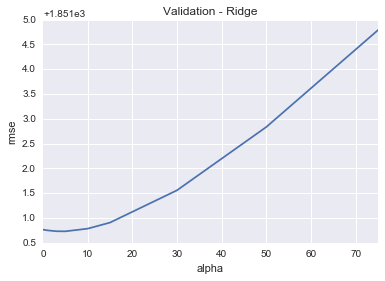

In [130]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [138]:
%%time
alphas2 = np.arange(1, 10, 0.1)
cv_ridge2 = [rmse_cv(Ridge(alpha = a)).mean() for a in alphas2]

CPU times: user 1min 34s, sys: 9.68 s, total: 1min 44s
Wall time: 53.6 s


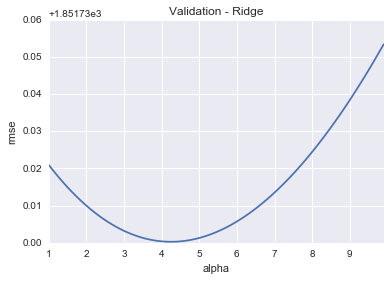

In [139]:
cv_ridge = pd.Series(cv_ridge2, index = alphas2)
cv_ridge.plot(title = "Validation - Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [145]:
print('The smallest MSE is %.4f given by alpha %.2f' % (cv_ridge.mean(), cv_ridge.argmin()) )

The smallest MSE is 1851.7445 given by alpha 4.20


In [146]:
model_ridge = Ridge(alpha = 4.2)
mse_ridge = mean_squared_error(y_test, model_ridge.fit(X_train, y_train).predict(X_test))
mse_ridge

1874.0126798532963

#### Lasso

In [148]:
%%time
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha = a)).mean() for a in alphas]

CPU times: user 2min 34s, sys: 3.83 s, total: 2min 38s
Wall time: 1min 26s


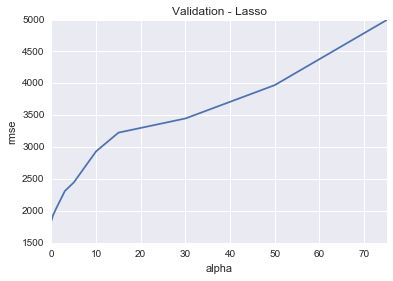

In [149]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

### RandomForestRegressor
- https://www.kaggle.com/dfitzgerald3/house-prices-advanced-regression-techniques/randomforestregressor/comments

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
%%time
from sklearn.metrics import make_scorer, mean_squared_error
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
cv_score = -cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = scorer)
## Took about 9 minutes

CPU times: user 8min 53s, sys: 11.9 s, total: 9min 5s
Wall time: 3min 46s


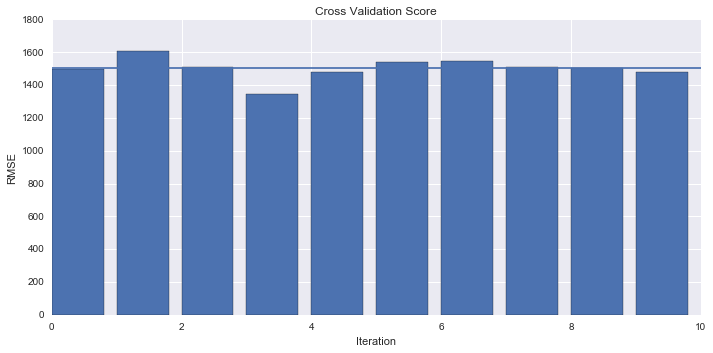

In [154]:
plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

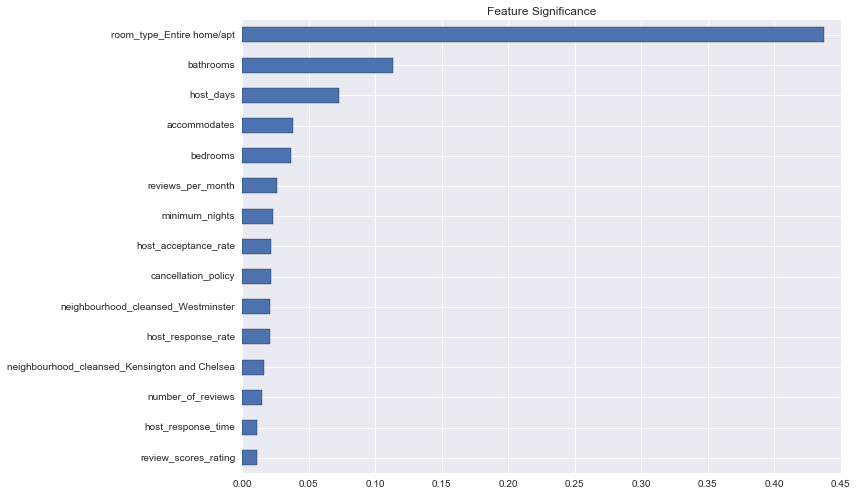

In [155]:
clf.fit(X_train, y_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)

plt.figure(figsize=(12, 7))
coef[:15].sort_values(ascending = True).plot(kind = 'barh')
plt.title('Feature Significance')
plt.tight_layout()

In [156]:
model_rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)
mse_rfr = mean_squared_error(y_test, model_rfr.fit(X_train, y_train).predict(X_test))

In [158]:
mse_rfr

1506.2166213424416